In [1]:
import numpy as np
import pylab as plt
import pickle as pkl
from scipy.optimize import minimize
from statistics import mean

In [2]:
# Dear all: Get this pickle file from the discord server!
with open("data.pkl", "rb") as handle:
    data = pkl.load(handle).T # check out that pesky little `.T`
#print(data.shape)

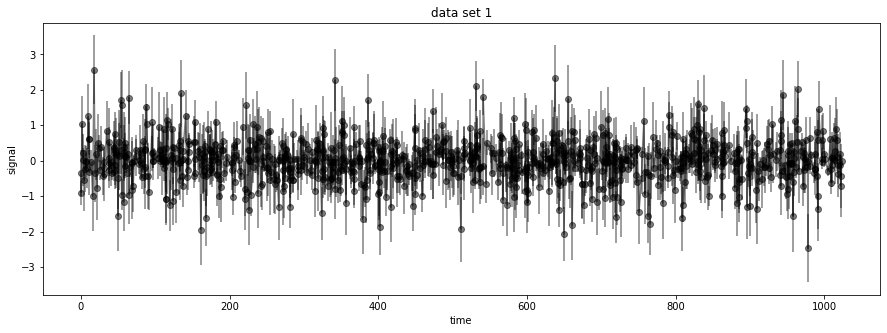

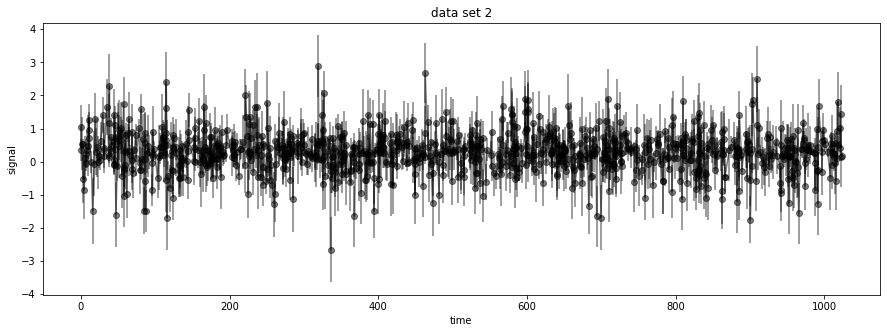

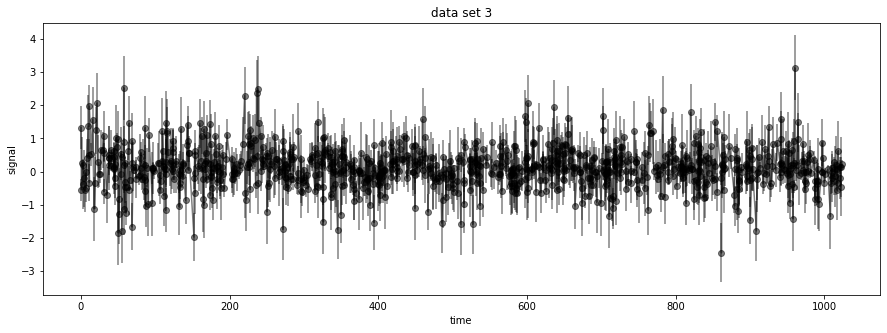

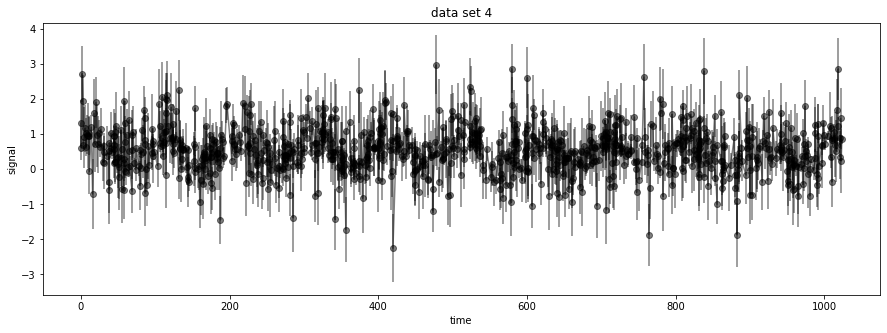

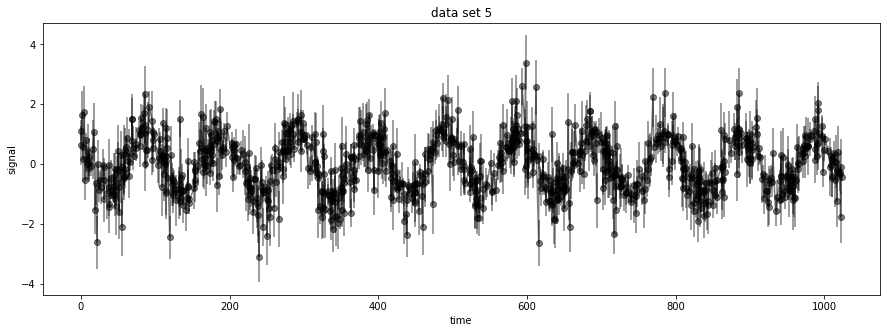

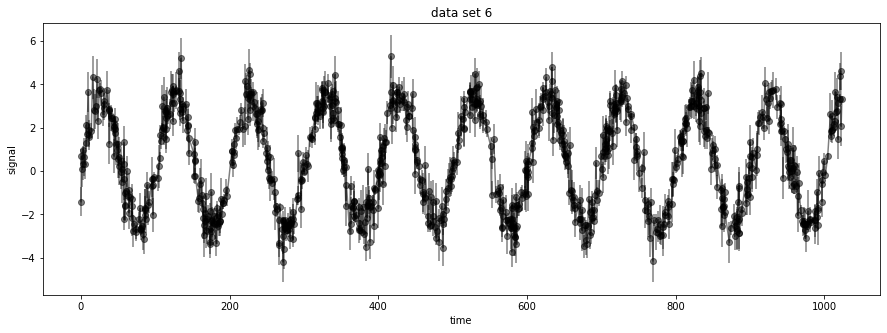

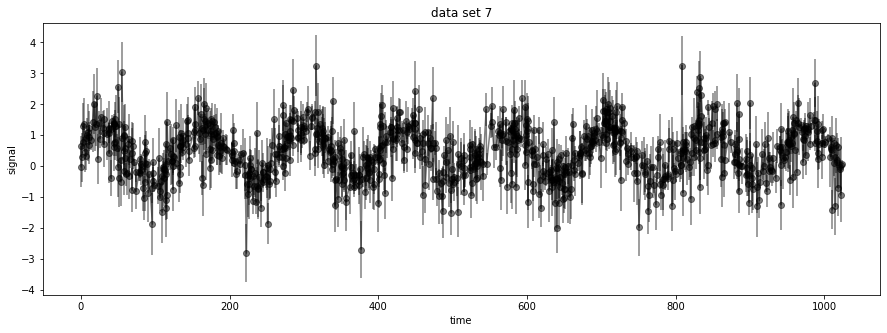

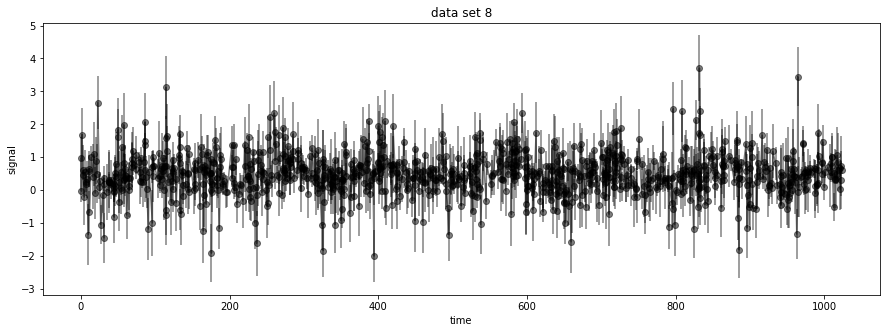

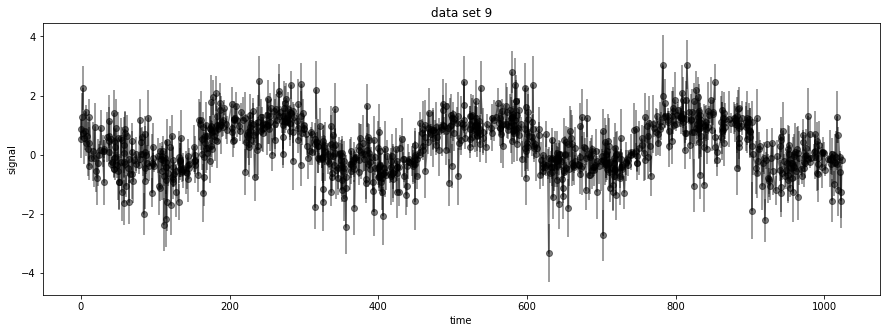

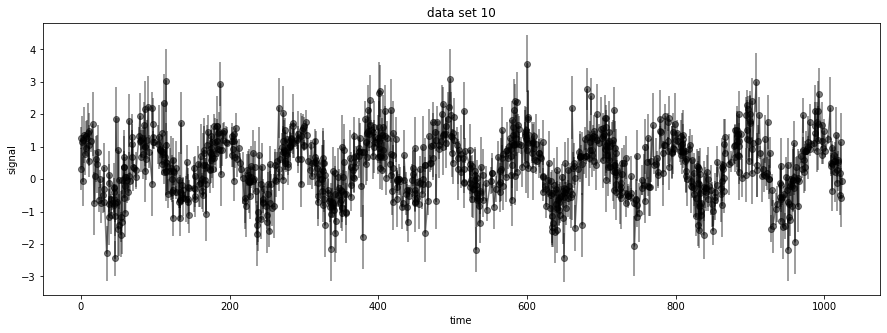

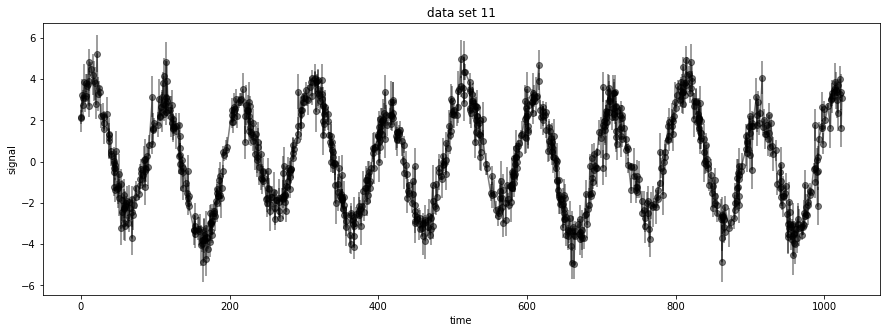

In [3]:
# Dear all:
# - data[0] is the array of times (day units, say?)
# - data[1] is the array of uncertainties (m/s units, say?)
# - data[2:13] are data sets (m/s units, say?).
# There are 11 data sets in all; they are illustrated in this code block.
for i in range(2, 13):
    plt.figure(figsize=(15, 5))
    plt.errorbar(data[0], data[i], yerr=data[1],
                 color="k", marker="o", alpha=0.5)
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("data set {}".format(i-1))

In [4]:
def fit(xvals,a,b,c,d):
    return a*np.sin((2*np.pi/b)*(xvals+c))+d    

## Problem 1

The amplitude of the 100 day signal in data set 1 is -0.00408688 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 2 is 0.04219532 with uncertainty 0.00018643 .
The amplitude of the 100 day signal in data set 3 is 0.11339181 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 4 is 0.24744629 with uncertainty 0.00018643 .
The amplitude of the 100 day signal in data set 5 is -0.85117408 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 6 is 3.00702066 with uncertainty 0.00018616 .
The amplitude of the 100 day signal in data set 7 is -0.03751301 with uncertainty 0.00018643 .
The amplitude of the 100 day signal in data set 8 is -0.10429129 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 9 is -0.31682104 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 10 is -0.7373828 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 11 is 

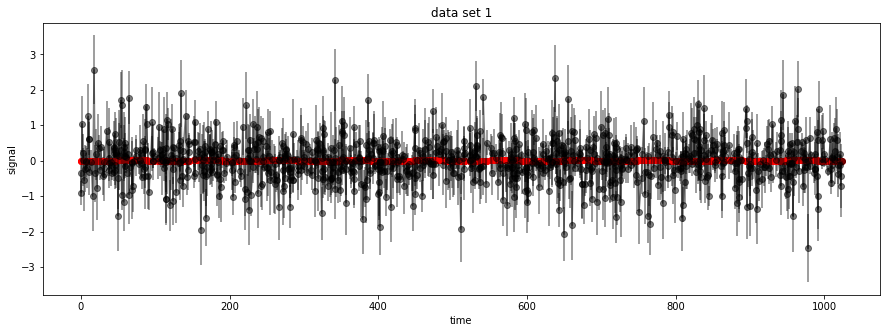

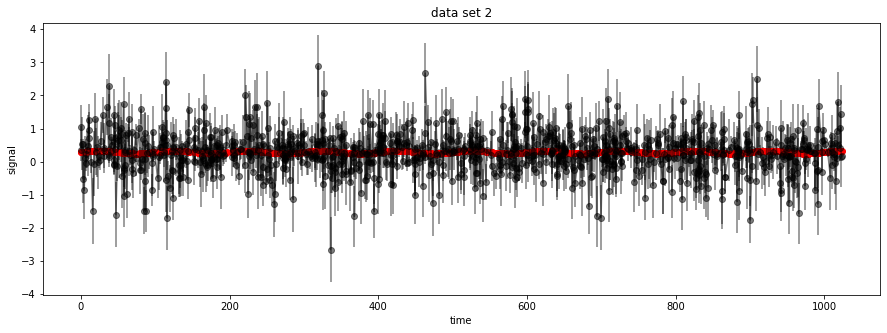

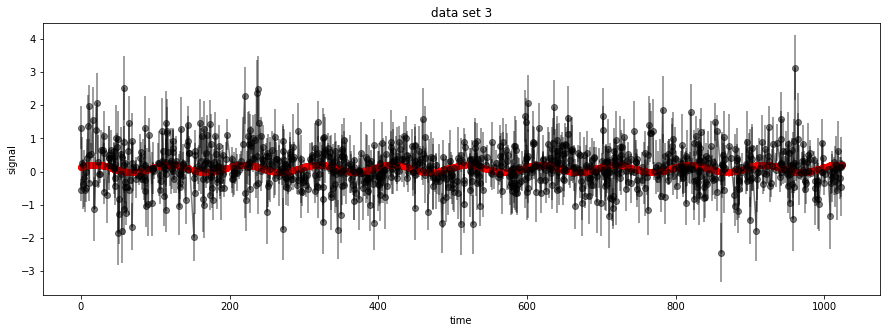

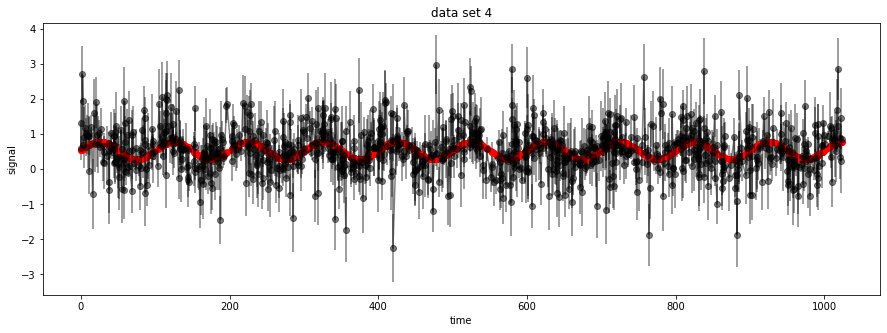

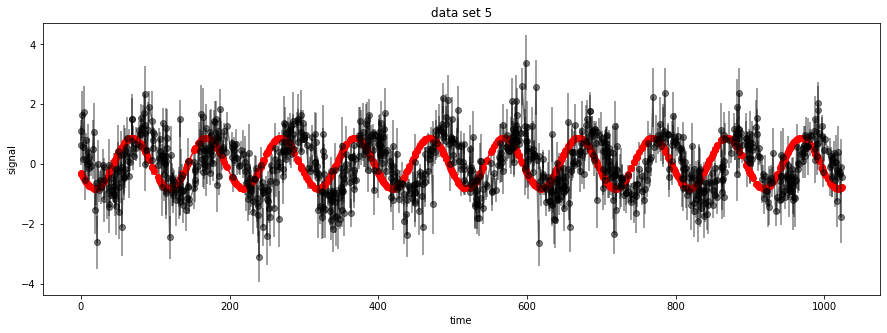

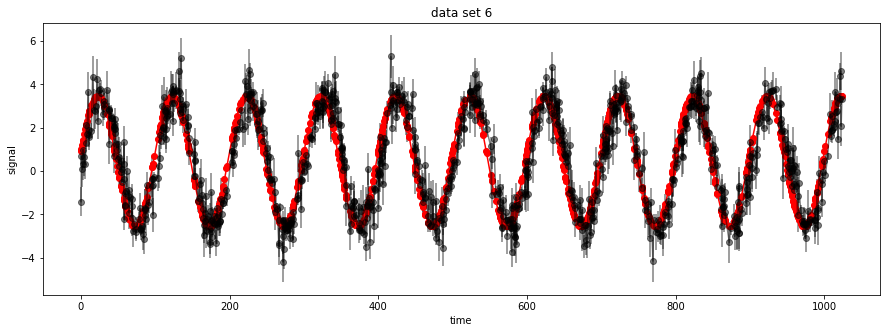

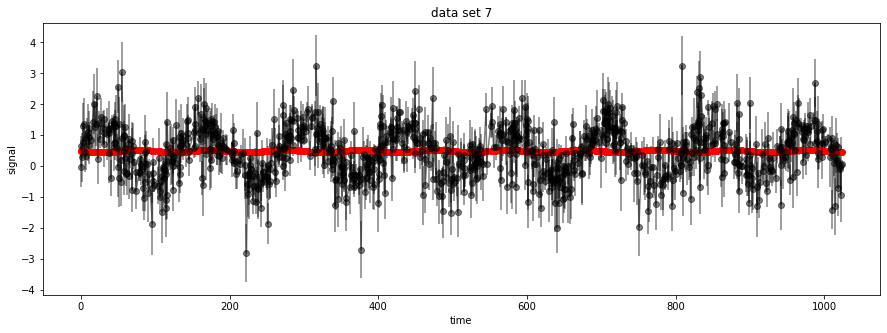

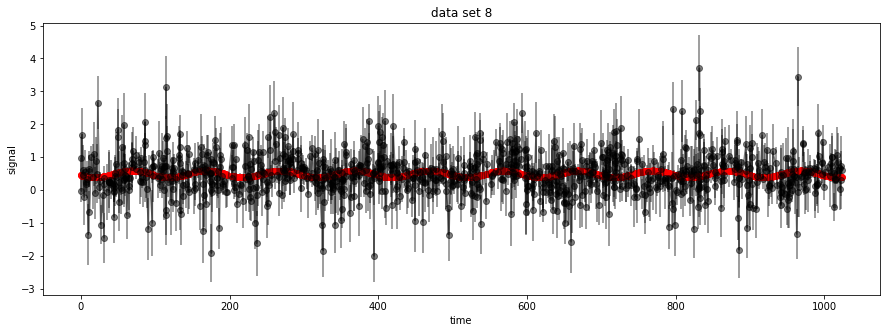

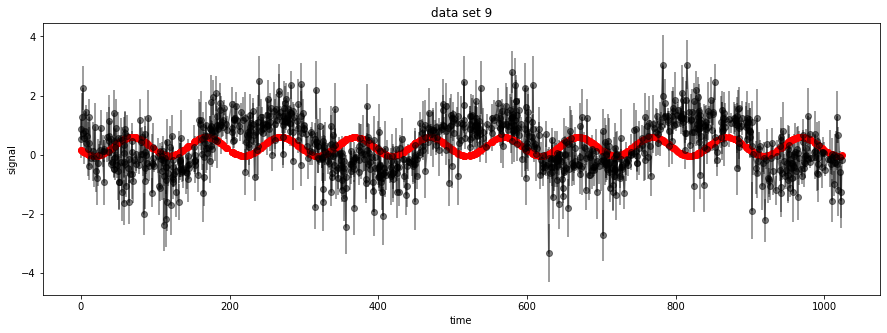

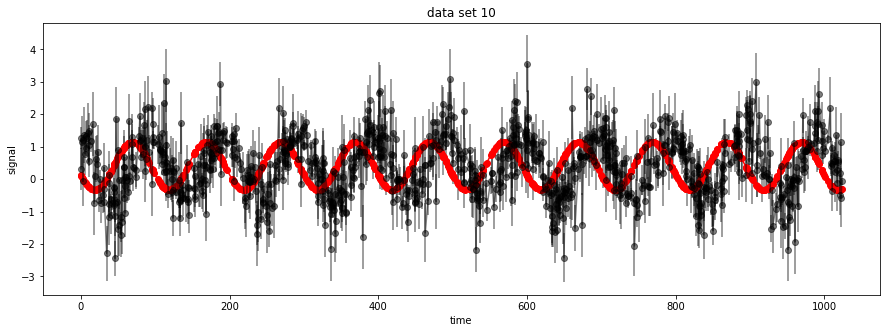

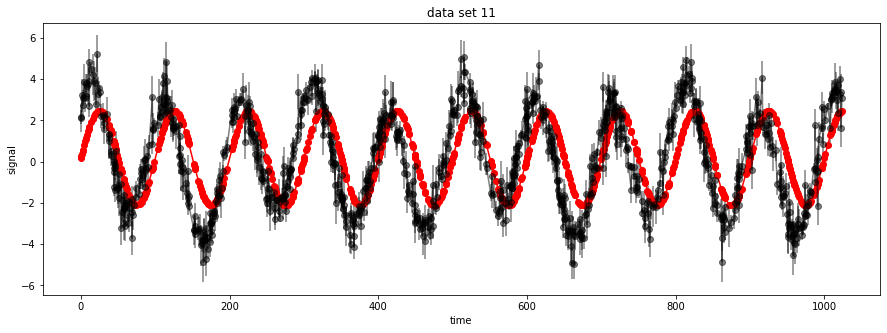

In [5]:
sign_data = []
for i in range(2,13):
    Y = data[i]
    phases = np.linspace(0,2*np.pi,200)
    chis = []
    for j in phases: #find the phase that minimizes chi^2 and then choose that one to be your phase
        A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/100*(data[0]-j))]) #this is really A transpose because of the way numpy works
        C_in = np.diagflat(1/(data[1])**2)
        X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y)
        chi_sq = (Y-A.T@X).T@C_in@(Y-A.T@X)
        chis.append(chi_sq)
    
    
    phase = phases[chis.index((min(chis)))] #choosing the phase that minimizes chi^2
    A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/100*(data[0]-phase))]) #this is really A transpose because of the way numpy works
    C_in = np.diagflat(1/(data[1])**2)
    X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y) 
    amp_var = np.linalg.inv((A@C_in@A.T))
    print('The amplitude of the 100 day signal in data set' ,i-1, 'is', 
          round(X[1],8),'with uncertainty', round(amp_var[1][1],8),'.' )
    
    sign_data.append((X[1],amp_var[1][1],100,phase,X[0])) #make a list of the signal variables
    #so we dont have to find them again later. 
    
    #plot the data and the found 100 day signal.
    plt.figure(figsize=(15, 5))
    plt.errorbar(data[0], data[i], yerr=data[1],
                 color="k", marker="o", alpha=0.5)
    plt.plot(data[0], fit(data[0],X[1],100,phase,X[0]),color = 'r', marker = 'o')
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("data set {}".format(i-1))
    

## Problem 2
Find a possible second signal. 

The amplitude of the  81.81818181818181  day signal in data set 1 is -0.02651582 with uncertainty 0.00020241 .
The amplitude of the  122.72727272727273  day signal in data set 2 is 0.03126167 with uncertainty 0.00018678 .
The amplitude of the  104.54545454545455  day signal in data set 3 is 0.10730999 with uncertainty 0.00019687 .
The amplitude of the  104.54545454545455  day signal in data set 4 is -0.1397128 with uncertainty 0.00019414 .
The amplitude of the  104.54545454545455  day signal in data set 5 is -0.77473917 with uncertainty 0.00019739 .
The amplitude of the  104.54545454545455  day signal in data set 6 is 0.6513042 with uncertainty 0.00019354 .
The amplitude of the  136.36363636363637  day signal in data set 7 is 0.75506063 with uncertainty 0.00019691 .
The amplitude of the  150.0  day signal in data set 8 is -0.21943651 with uncertainty 0.00019174 .
The amplitude of the  300.0  day signal in data set 9 is -0.81132219 with uncertainty 0.00019226 .
The amplitude of the  104

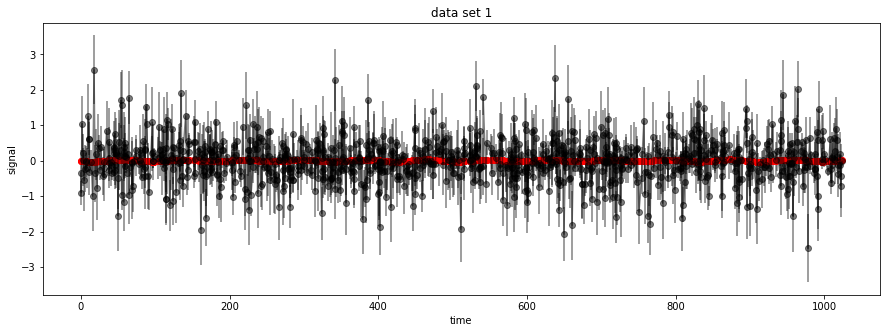

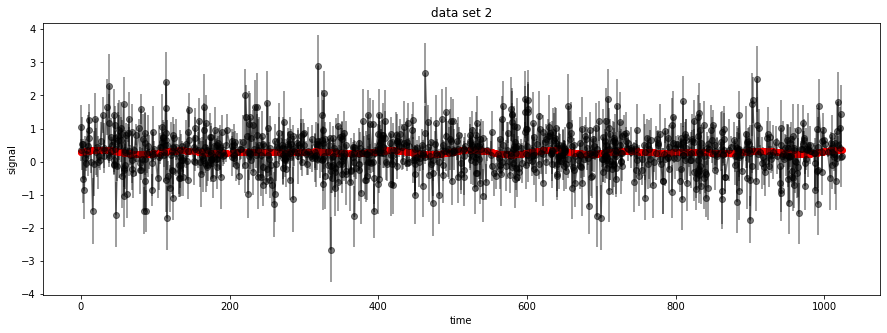

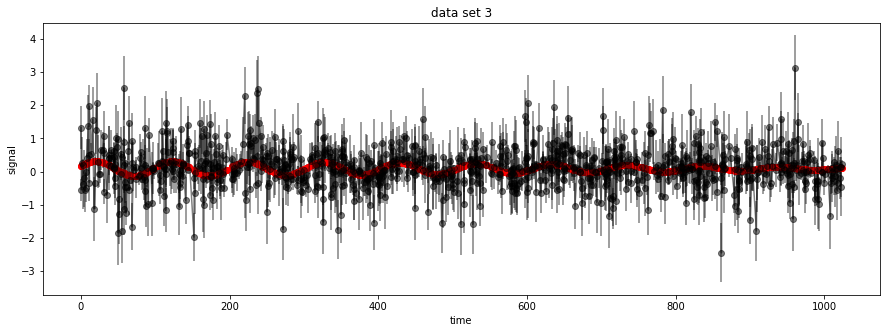

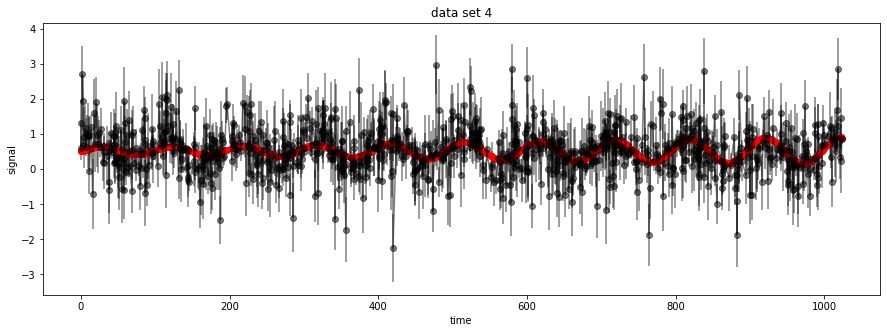

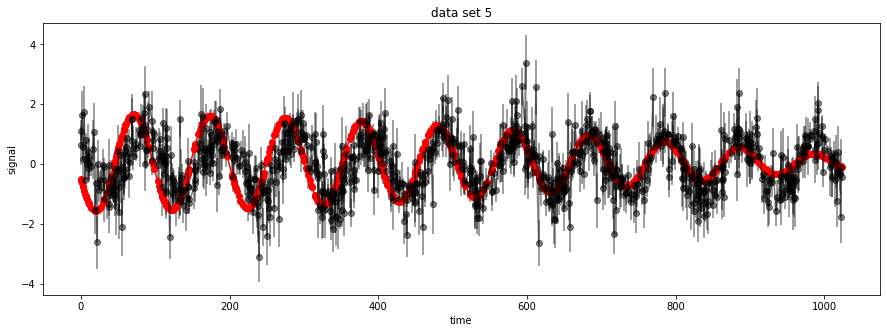

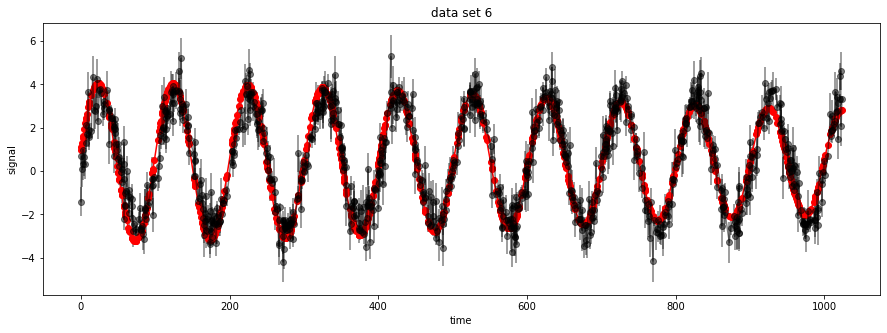

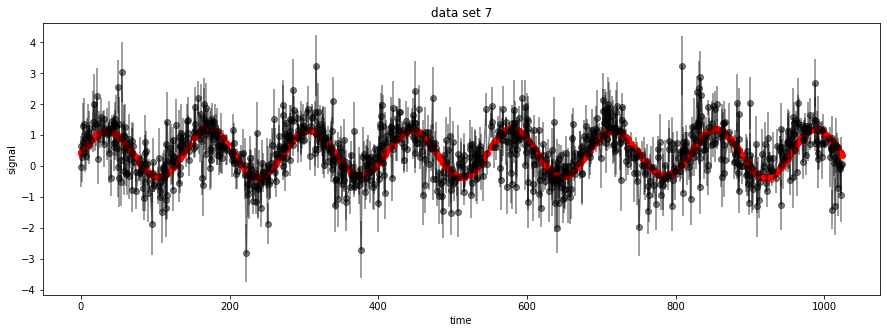

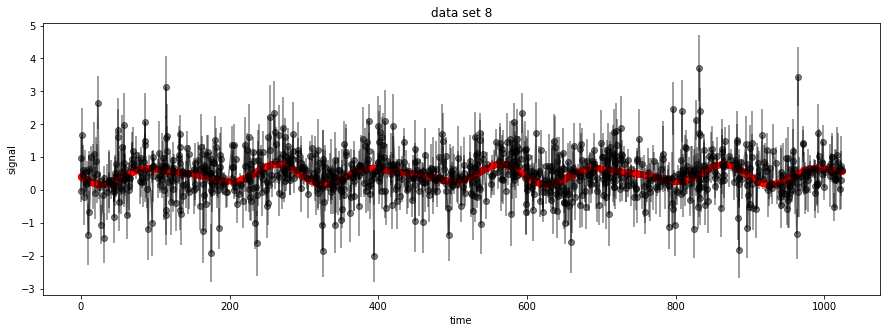

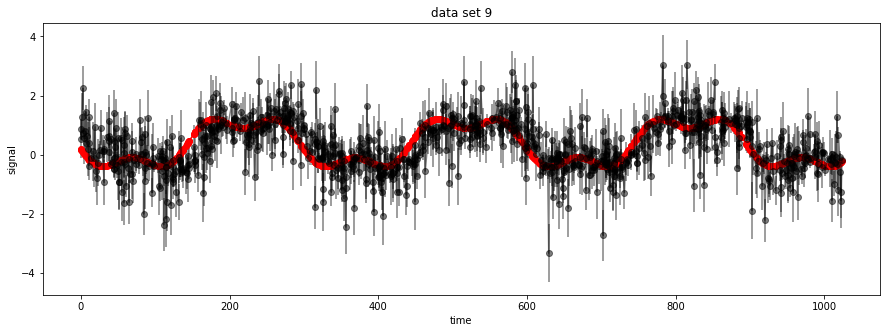

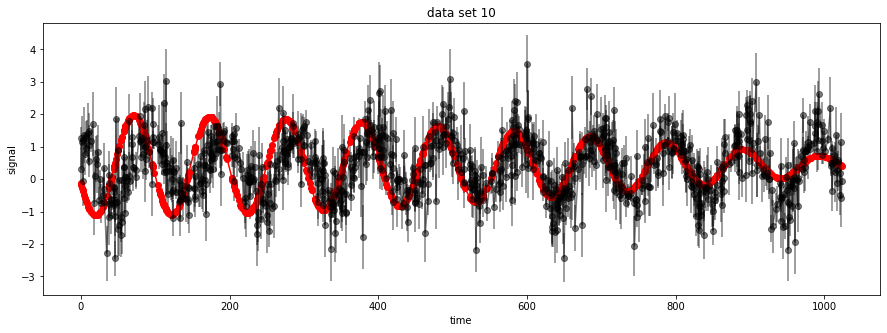

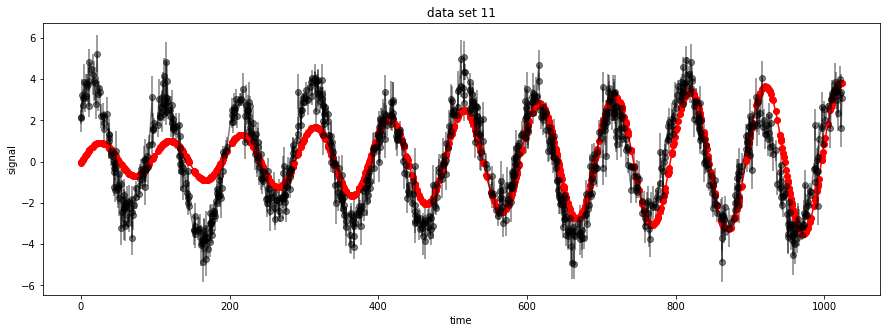

In [6]:
sec_sign_data = []
for i in range(2,13):
    Y = data[i] - fit(data[0],sign_data[i-2][0],100,sign_data[i-2][3],sign_data[i-2][4])
    phases = np.linspace(0,2*np.pi,200)
    periods  = np.linspace(50,500,100)
    chis = [(100000000,10)]
    for j in phases: #find the phase that minimizes chi^2 and then choose that one to be your phase
        for k in periods:
            A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/k*(data[0]-j))]) #this is really A transpose because of the way numpy works
            C_in = np.diagflat(1/(data[1])**2)
            X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y)
            chi_sq = (Y-A.T@X).T@C_in@(Y-A.T@X)
            if chi_sq < chis[-1][0]:
                chis.append((chi_sq,j,k))
            
    phase = chis[-1][1] #choosing the phase that minimizes chi^2
    period = chis[-1][2]
    A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/period*(data[0]-phase))]) #this is really A transpose because of the way numpy works
    C_in = np.diagflat(1/(data[1])**2)
    X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y) 
    amp_var = np.linalg.inv((A@C_in@A.T))
    print('The amplitude of the ',period ,' day signal in data set' ,i-1, 'is', 
          round(X[1],8),'with uncertainty', round(amp_var[1][1],8),'.' )
    
    sec_sign_data.append((X[1],amp_var[1][1],period,phase,X[0])) #make a list of the amplitudes and uncertainties 
    #so we dont have to find them again later. 
    
    #plot the data and the found 100 day signal.
    plt.figure(figsize=(15, 5))
    plt.errorbar(data[0], data[i], yerr=data[1],
                 color="k", marker="o", alpha=0.5)
    plt.plot(data[0], fit(data[0],X[1],period,phase,X[0])+fit(data[0],sign_data[i-2][0],100,sign_data[i-2][3],sign_data[i-2][4])
             ,color = 'r', marker = 'o')
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("data set {}".format(i-1))
    

I dont really believe in all of these 104 day signals. That period is so close to the 100 day signal. It seems to me that qualitatively, in data set 3,4,5,6,11, the fit is not actually better. In some cases it is worse, in others there is no visual difference. Data set 1 may just be noise. The 81 day signal here is an order of magnitude above the 100 day signal found in problem 1 - but still the noise floor is so high I doubt it is real. I feel similarly about data set 2. So, I think that data sets 7,8,9,10 have actual genuine second signals. Let's use bootstrap to find the uncertainty in those periods. 

In [14]:
for i in range(2,13):
    M = 50
    period_data = np.linspace(0,0,M)
    if i-1 in [7,8,9,10]: #pick only the significant second signals
        Y1 = data[i] - fit(data[0],sign_data[i-2][0],100,sign_data[i-2][3],sign_data[i-2][4]) #subtract the 100d signal
        x = np.linspace(0,0,len(Y1))
        Y = np.linspace(0,0,len(Y1))
        sigs = np.linspace(0,0,len(Y1))
        for m in range(M): # Do M iterations of the boostrap
            for j in range(len(Y)): #generate new data x, and Y
                k = np.random.randint(0,len(Y))
                Y[j] = Y1[k]
                x[j] = data[0][k]
                sigs[j] = data[1][k]
#             plt.figure(figsize=(15, 5))
#             plt.errorbar(data[0], data[i], yerr=data[1],
#                          color="k", marker="o", alpha=0.5)
#             plt.xlabel("time")
#             plt.ylabel("signal")
#             plt.title("data set {}".format(i-1))
            phase = sec_sign_data[i-2][3]#use the phase for the signal we found earlier
            periods  = np.linspace(50,500,450) #scan period space to minimize chi^2
            chis = [(100000000,10)]
            for l in periods:
                A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/l*(x-phase))]) #this is really A transpose because of the way numpy works
                C_in = np.diagflat(1/(sigs)**2) 
                X = np.linalg.inv(A@C_in@A.T)@((A@C_in)@Y)
                chi_sq = (Y-A.T@X).T@C_in@(Y-A.T@X)
                if chi_sq < chis[-1][0]:
                    chis.append((chi_sq,l))

            period2 = chis[-1][1]
            period_data[m] = (period2 - sec_sign_data[i-2][2])**2 # add the period we found to a list.
            
        var_period = np.sqrt(mean(period_data))
        print('The period of the second signal in data set',i-1,'is',sec_sign_data[i-2][2],'with period uncertainty',var_period,'.')
        

The period of the second signal in data set 7 is 136.36363636363637 with period uncertainty 1.6901818375262654 .
The period of the second signal in data set 8 is 150.0 with period uncertainty 0.4658463399410292 .
The period of the second signal in data set 9 is 300.0 with period uncertainty 1.280768850096222 .
The period of the second signal in data set 10 is 104.54545454545455 with period uncertainty 1.4143470133552454 .


We can now go back and remeasure the 100-day signals with marginalizing out the other significant signals.

The amplitude of the 100 day signal in data set 7 is 0.01280826 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 8 is -0.09287086 with uncertainty 0.00018757 .
The amplitude of the 100 day signal in data set 9 is -0.33892203 with uncertainty 0.00018759 .
The amplitude of the 100 day signal in data set 10 is -0.28172417 with uncertainty 0.00018759 .


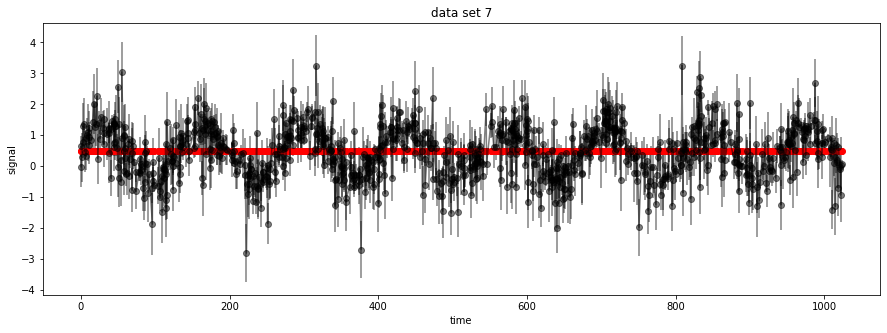

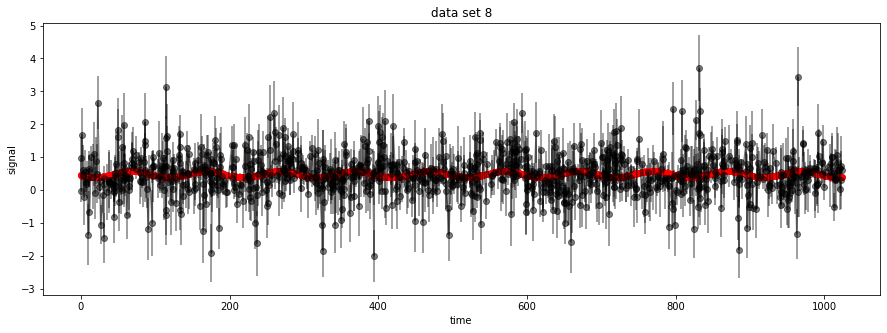

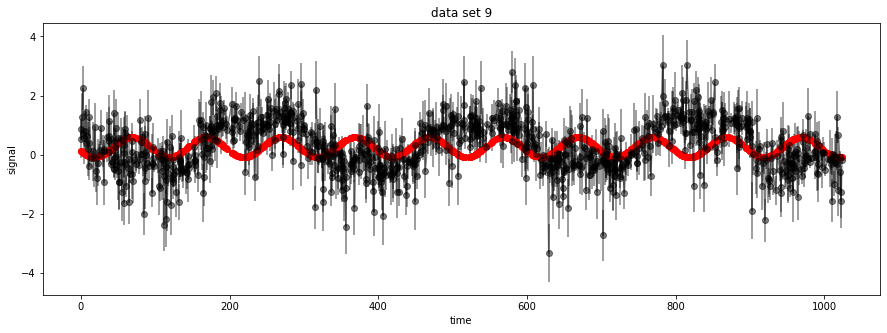

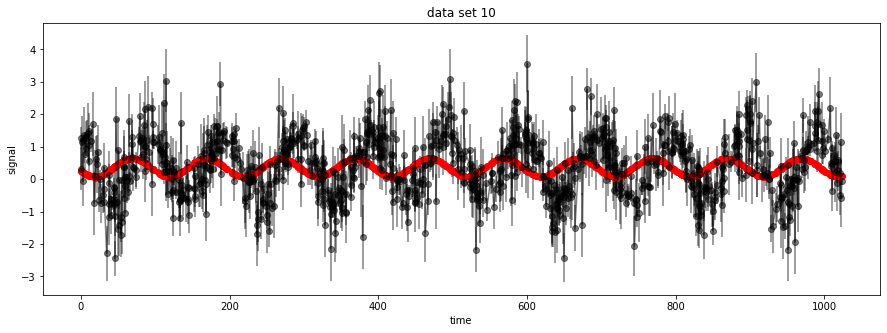

In [16]:
for i in range(2,13):
    if i-1 in [7,8,9,10]: #pick only the significant second signals
        Y = data[i] - fit(data[0],sec_sign_data[i-2][0],sec_sign_data[i-2][2],sec_sign_data[i-2][3],sec_sign_data[i-2][4])
        phases = np.linspace(0,2*np.pi,200)
        chis = []
        for j in phases: #find the phase that minimizes chi^2 and then choose that one to be your phase
            A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/100*(data[0]-j))]) #this is really A transpose because of the way numpy works
            C_in = np.diagflat(1/(data[1])**2)
            X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y)
            chi_sq = (Y-A.T@X).T@C_in@(Y-A.T@X)
            chis.append(chi_sq)


        phase = phases[chis.index((min(chis)))] #choosing the phase that minimizes chi^2
        A = np.array([np.ones(len(data[0])),np.sin(2*np.pi/100*(data[0]-phase))]) #this is really A transpose because of the way numpy works
        C_in = np.diagflat(1/(data[1])**2)
        X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y) 
        amp_var = np.linalg.inv((A@C_in@A.T))
        print('The amplitude of the 100 day signal in data set' ,i-1, 'is', 
              round(X[1],8),'with uncertainty', round(amp_var[1][1],8),'.' )

        sign_data.append((X[1],amp_var[1][1],100,phase,X[0])) #make a list of the signal variables
        #so we dont have to find them again later. 

        #plot the data and the found 100 day signal.
        plt.figure(figsize=(15, 5))
        plt.errorbar(data[0], data[i], yerr=data[1],
                     color="k", marker="o", alpha=0.5)
        plt.plot(data[0], fit(data[0],X[1],100,phase,X[0]),color = 'r', marker = 'o')
        plt.xlabel("time")
        plt.ylabel("signal")
        plt.title("data set {}".format(i-1))